<a href="https://colab.research.google.com/github/ahmedhamza41/portfo/blob/main/case_study_developer_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- The assignment is split into two sections. The first section will be an exploratory analysis of the dataset we have provided. The second section will be a more fundamental prediction problem. These sections are not necessarily mutually exclusive, and we hope that you can use some of the insight gained in section 1 to inform your decisions in section 2.
Section 1 

- The data 
You will only need to use the data we have provided. The dataset is the public results of Stack Overflow’s developer 

- survey:
  • survey results public.csv - The survey results from the Stack Overflow Developer Survey. Each row is one respondent’s answers. 
  • survey results schema.csv - A schema providing a brief description of each column of the above dataset.

**Exploratory Data Analysis** 

Please provide an exploratory analysis of this dataset. We would usually treat this section as a narrative, providing an explanation for each piece of analysis we produce. We expect part of this exploration to be a basis for the next section. For section 1, you are free to use whichever approach/approaches you feel most comfortable with or find most suitable. We do ask, however, that what you provide is reproducible on our end. 

**Predictive Model**

- Finally, we would like you to create a (Python code based, reproducible) model that can predict the number of years' experience a respondent has had programming.

- We would like to see a model that works best on this prediction task, with a clear representation of the model selection and performance testing that you have applied. 
- Please provide a clear explanation of your choices and results in the walk through.

- Lastly, we would like you to walk us through your work. This will be a chat on how you approached the problem, the solution you arrived at and any problems you may have encountered. Please provide a walk through and reflection on the analysis you have provided. 


# Exploratory Data Analysis - Stack Overflow Developer Survey

![](https://miro.medium.com/max/828/1*o0gZ9tb8kNfBtuzLK0-wUA.png)


EDA is the process of exploring, investigating and gathering insights from data to develop an understanding of the  data, by uncovering trends, relationships and patterns.

EDA requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

**The following topics are covered in this tutorial:**

- Loading The Data
- Data Analysis
- Feature Engineering
- Predictive Model & Featue Selection

## Loading The Data

In this notebook, we will analyze the StackOverflow Developer Survey 2022 dataset. The dataset contains responses to an annual survey conducted by StackOverflow.

The dataset contains three files:

- `README.txt` - Information about the dataset
- `survey_results_schema.csv` - The list of questions, and shortcodes for each question
- `survey_results_public.csv` - The full list of responses to the questions 

Let's load the CSV files using the Pandas library. We'll use the name `raw_df` for the data frame to indicate this is unprocessed data.

In [1]:
import sys
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
from packaging import version
import sklearn

assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

try:
  import feature_engine
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install feature-engine

  import feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 6.2 MB/s 


In [2]:
# In google colab, we need to upload the file to be able to open it
def get_data():
  uploaded = files.upload()
  raw_df = pd.read_csv(io.BytesIO(uploaded['survey_results_public.csv']))
  return raw_df

In [3]:
raw_df = get_data()

Saving survey_results_public.csv to survey_results_public.csv


Lets take a copy for the survey to keep the raw version untouched

In [4]:
survey_df = raw_df.copy()
survey_df.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencySymbol,...,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,EUR,...,NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,GBP,...,Less than once per month or monthly,Multiple times per day,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,4,NaN


Lets upload the schema file to see the full text of each question for each column. It cotains two columns; Column name and QuestionText. We can load it as Pandas Series with Column as the index and the QuestionText as the value but first we have o remove the deleted question to match the schema with the survey.

In [5]:
uploaded = files.upload()
schema_df = pd.read_csv(io.BytesIO(uploaded['survey_results_schema.csv']))
schema_df.head()

Saving survey_results_schema.csv to survey_results_schema.csv


,Column,QuestionText,Unnamed: 2
0,Respondent,Randomized respondent ID number (not in order ...,NaN
1,MainBranch,Which of the following options best describes ...,NaN
2,Hobbyist,Do you code as a hobby?,NaN
3,Age,What is your age (in years)? If you prefer not...,NaN
4,Age1stCode,At what age did you write your first line of c...,NaN


In [6]:
# remove the deleted question from the schema
schema_df = schema_df.loc[schema_df['Unnamed: 2'] != 'Removed'].reset_index()
# reset index to have the column name and remove extra columns
schema_df = schema_df.drop(['Unnamed: 2','Column', 'index'], axis=1).set_index(raw_df.columns)
schema_df.head()

,QuestionText
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...


Now we can use schema_raw to retrieve the full question text for any column in survey_raw_df.

In [7]:
schema_raw = schema_df.QuestionText
schema_raw.head()

Respondent    Randomized respondent ID number (not in order ...
MainBranch    Which of the following options best describes ...
Hobbyist                                Do you code as a hobby?
Age           What is your age (in years)? If you prefer not...
Age1stCode    At what age did you write your first line of c...
Name: QuestionText, dtype: object

Now we can use schema_raw to retrieve the full question text for any column in survey_raw_df.

In [8]:
schema_raw['Age']

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

The dataset contains 64,461 responses to 51 questions after the removal of 9 questions. Each respondent has been assigned a randomized respondent ID.

## Data Analysis

At this step we will be exploring, investigating and gathering insights from data to develop an understanding of the data, by uncovering trends, relationships and patterns. It also requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

###Exploring the data

In [9]:
schema_df

,QuestionText
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
CompFreq,"Is that compensation weekly, monthly, or yearly?"
CompTotal,What is your current total compensation (salar...
ConvertedComp,Salary converted to annual USD salaries using ...
Country,Where do you live?
CurrencySymbol,Which currency do you use day-to-day? If your ...


In [10]:
len(survey_df)

64461

In [11]:
survey_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencySymbol',
       'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel',
       'Employment', 'JobFactors', 'JobSat', 'JobSeek',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'OpSys',
       'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith',
       'PurchaseWhat', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq',
       'SurveyEase', 'SurveyLength', 'UndergradMajor',
       'WebframeDesireNextYear', 'WebframeWorkedWith', 'WorkWeekHrs',
       'YearsCode', 'YearsCodePro'],
      dtype='object')

In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              64461 non-null  int64  
 1   MainBranch              64162 non-null  object 
 2   Hobbyist                64416 non-null  object 
 3   Age                     45446 non-null  float64
 4   Age1stCode              57900 non-null  object 
 5   CompFreq                40069 non-null  object 
 6   CompTotal               34826 non-null  float64
 7   ConvertedComp           34756 non-null  float64
 8   Country                 64072 non-null  object 
 9   CurrencySymbol          45472 non-null  object 
 10  DatabaseDesireNextYear  44070 non-null  object 
 11  DatabaseWorkedWith      49537 non-null  object 
 12  DevType                 49370 non-null  object 
 13  EdLevel                 57431 non-null  object 
 14  Employment              63854 non-null

- There are a mixture of categorical and numerical variables. Numerical are those of type float and categorical those of type object.
- Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). 
- We can also see that all columns have missing values as the number of values for each one is less than the length of the dataset which is 64461.

So far I have only taken a quick glance at the data to get a general understanding of the kind of data. Now the goal is to go into a little more depth.
**First, I will make sure to put the test set aside and to only exploring  the training set.**

### Split to Train and Test

We should split the data before doing any feature engineering action. Test set is considered a data we don't, so we should avoid any leaking from the train to the test set. I will split the data to 90% training set and 10% test

We can also see that the target has missing values. There are several ways to handle this, e.g. we can predict the missing values with iterative procedure. **I will drop the missing target values as a first approach and if I have time after, I will try different ways.**

In [13]:
from sklearn.model_selection import train_test_split
from feature_engine.imputation import DropMissingData

imputer = DropMissingData(
    variables=['YearsCodePro'],
    missing_only=False,
)

imputer.fit_transform(survey_df)
survey_df = imputer.transform(survey_df)
len(survey_df)

46349

- **'Respondent':** is a unique identifier for each of the houses. Thus this is not a variable that we can use.
- **'YearsCodePro':** is the target of our analysis so it should be handled separately.

In [14]:
# Let's separate into train and test set

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(survey_df.drop(['Respondent','YearsCodePro'], axis=1),
                                                    survey_df['YearsCodePro'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train_full.shape, X_test_full.shape

((41714, 49), (4635, 49))

For this stage, I will concatenate the target column 'YearsCodePro' with the X_train to make it easier to explore the data. Since I am going to experiment with this data, I should make a copy of
the original training set so I can revert to it afterwards.

In [15]:
survey = X_train_full.copy()
survey['YearsCodePro'] = y_train_full
survey.head(1)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencySymbol,DatabaseDesireNextYear,...,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WorkWeekHrs,YearsCode,YearsCodePro
44395,I am a developer by profession,No,30.0,15,Monthly,2700.0,35028.0,Germany,EUR,Microsoft SQL Server;SQLite,...,Daily or almost daily,Daily or almost daily,Easy,Appropriate in length,"Information systems, information technology, o...",ASP.NET Core;jQuery;React.js,ASP.NET;ASP.NET Core;jQuery,40.0,6,5


In [16]:
len(survey)

41714

###Types of features

Lets find the types of features and add them to different lists 

####Find numerical variables

In [17]:
# make a list of the numerical variables first
def find_numerical_features(df, excluded_features=[]):
  numerical = [var for var in df.columns if df[var].dtype!='O' and var not in excluded_features]
  print('There are {} numerical variables'.format(len(numerical)))
  return numerical

In [18]:
numerical = find_numerical_features(survey)
numerical

There are 4 numerical variables


['Age', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs']

Only 'Age', 'CompTotal', 'ConvertedComp' and 'WorkWeekHrs' are recognised as numeric values, by exploring the data we can see that 'Age1stCode', 'YearsCode' and 'YearsCodePro' are numerical features but catigorized as object. 

Lets explore them:

In [19]:
survey['Age1stCode'].unique()

array(['15', '12', '10', '19', '40', '7', '13', '20', '16', '18', '29',
       '14', '11', '17', '25', '9', '26', '31', '6', '22', '27', '5', '8',
       '47', '35', '23', '36', '21', '33', '28', '24',
       'Younger than 5 years', '39', nan, '44', '37', '38', '34', '43',
       '30', '32', '46', '41', '45', '83', 'Older than 85', '55', '50',
       '48', '52', '49', '42', '85', '54'], dtype=object)

In [20]:
survey['YearsCode'].unique()

array(['6', '8', '14', '22', '9', '2', '27', '25', '12', '5', '45', '26',
       '17', '10', '7', '15', '3', '11', '21', '18', '4', '28', '23',
       '35', '20', '33', '32', '13', '16', '19', '37', '42', '1', '30',
       '24', nan, '44', '40', '38', '39', 'Less than 1 year', '43', '48',
       '36', '41', '29', 'More than 50 years', '34', '31', '50', '47',
       '49', '46'], dtype=object)

In [21]:
survey['YearsCodePro'].unique()

array(['5', '3', '21', '2', '20', 'Less than 1 year', '10', '16', '12',
       '9', '18', '4', '6', '8', '7', '14', '15', '13', '1', '17', '23',
       '22', '19', '26', '11', '39', '25', '31', '38', '30', '28', '35',
       '40', '29', '24', '27', '33', '34', 'More than 50 years', '45',
       '37', '41', '32', '36', '42', '43', '47', '44', '46', '49', '50',
       '48'], dtype=object)

As we can see, they have some string values, so they were catigorized as objects.

I will map the string values to integers and convert the type to float to be able to continue exploring the data. **Any data manipulation at this section is only for demonstration. They will be repeated in the feature engineering part as we shouldn't modify the data before splitting to train and test sets.**


In [22]:
def change_objects_type(df, string_to_int, obj_to_num_features):
  for var in obj_to_num_features:
    df[var] = df[var].replace(string_to_int).astype(float)
  return df

In [23]:
string_to_int={'Younger than 5 years': 5, 'Older than 85': 85, 'Less than 1 year': 1, 'More than 50 years': 50, 'Less than 1 year': 1, 'More than 50 years': 50}
obj_to_num_features = ['Age1stCode', 'YearsCode', 'YearsCodePro']

survey = change_objects_type(survey, string_to_int, obj_to_num_features)

survey['YearsCodePro'].unique(), survey['YearsCodePro'].dtype

(array([ 5.,  3., 21.,  2., 20.,  1., 10., 16., 12.,  9., 18.,  4.,  6.,
         8.,  7., 14., 15., 13., 17., 23., 22., 19., 26., 11., 39., 25.,
        31., 38., 30., 28., 35., 40., 29., 24., 27., 33., 34., 50., 45.,
        37., 41., 32., 36., 42., 43., 47., 44., 46., 49., 48.]),
 dtype('float64'))

Now all values are floats, and the type is float64

In [24]:
# lets exclude the target from the numerical list
numerical = find_numerical_features(survey, excluded_features=['YearsCodePro'])
numerical

There are 6 numerical variables


['Age', 'Age1stCode', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'YearsCode']

####Find categorical variables

In [25]:
# find categorical variables

def find_categorical_features(df, excluded_features=['YearsCodePro']):
  categorical = [var for var in df.columns if df[var].dtype=='O' and var not in excluded_features]
  print('There are {} categorical variables'.format(len(categorical)))
  return categorical


In [26]:
categorical = find_categorical_features(survey)
categorical

There are 43 categorical variables


['MainBranch',
 'Hobbyist',
 'CompFreq',
 'Country',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith']

####Find discrete variables
To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values. See below.

In [27]:
# let's visualise the values of the discrete variables
discrete = []
def find_discrete_features(df):
  for var in numerical:
      if len(df[var].unique()) < 20:
         print(var, ' values: ', df[var].unique())
         discrete.append(var)
  print('There are {} discrete variables'.format(len(discrete)))
  return discrete

In [28]:
discrete = find_discrete_features(survey)
discrete

There are 0 discrete variables


[]

ALl the numerical values we have are Continuous

### Relationship with the target 

####Numerical values: Linearity 

Let's visualize the relationship between the numerical values and the target using scatter plot

In [29]:
# let's define a function to plot scatter graph between the numerical variables and the target 
def plot_scatter(df, variables, target, figsize=(8,4)):
  for var in variables:
    plt.figure(figsize=(12,4))
    fig = df.plot(kind='scatter', x=var, y=target, grid=True)
    fig.set_ylabel(target)
    fig.set_xlabel(var)
    plt.show();

<Figure size 864x288 with 0 Axes>

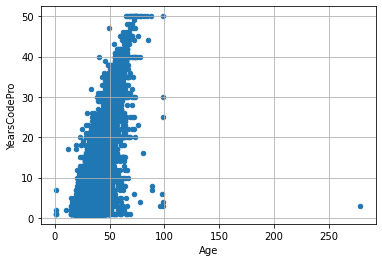

<Figure size 864x288 with 0 Axes>

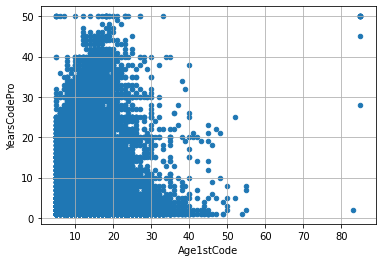

<Figure size 864x288 with 0 Axes>

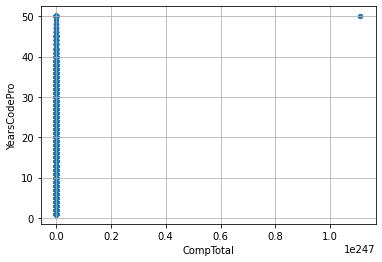

<Figure size 864x288 with 0 Axes>

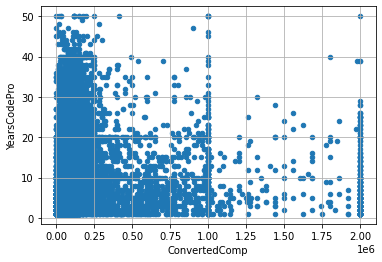

<Figure size 864x288 with 0 Axes>

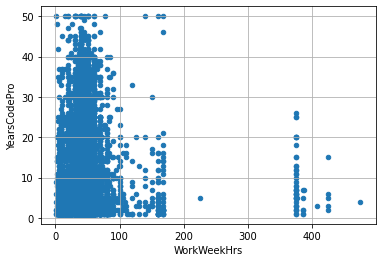

<Figure size 864x288 with 0 Axes>

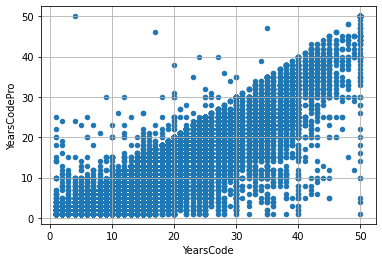

In [30]:
plot_scatter(survey, numerical, 'YearsCodePro')

- **Age:** The relationship with the mean is kind of linear as we see an increase in the years of epxerience with the age and this makes since as most people start their career ealry so we expect more experience with time. We can also see that there is an outlier with 279 which needs to be taken care of.
- **Age1stCode:** Most peoaple in the survey started coding before the age of 25 and so they have more experience as shown.
- **CompTotal:** an outliers is blocking the view of the curve, we need to handle it first to see the relationship.
- **ConvertedComp:** We can see that most of poeple are getting paid lss than 400,000 USD, but the relationship with the target is not clear
- **WorkWeekHrs:** Can't see a clear relationship but the average is around 40 as normal.
- **YearsCode:** There is a clear linear relationship with the target which makes since as years of coding is a clear indecation of the profissional coding.

#### Categorical features: Monotoncity

A monotonic relationship with the target, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target value decreases.

let's explore the relationship of the categories with the target

In [31]:
# let's explore the relationship of the categories with the target

def plot_monot_hist_dist(df, variables, figsize=(7,4)):
  for var in variables:
    fig = plt.figure()
    fig = df.groupby([var])['YearsCodePro'].mean().plot()
    fig.set_title('Relationship between {} and YearsCodePro'.format(var))
    fig.set_ylabel('Mean YearsCodePro')
    plt.xticks([])
    plt.show()

Let's draw some random categories

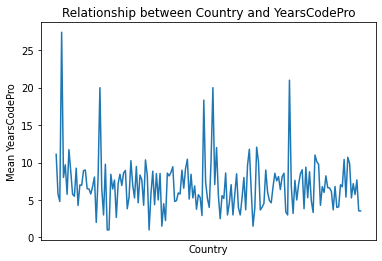

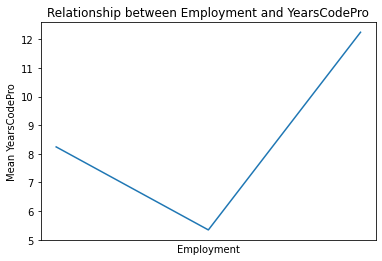

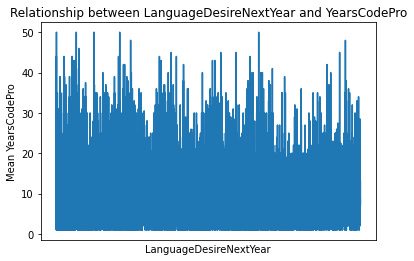

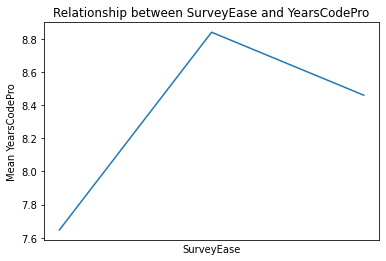

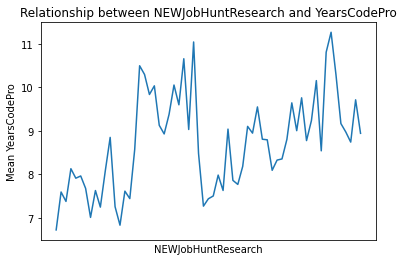

In [32]:
import random

random.seed(32)
random_catifories = random.choices(categorical, k=5, )

plot_monot_hist_dist(survey, random_catifories)

**You can see that the relationship between the target and the categories of the categorical variables goes up and down, depending on the category.**

I will deal with that by ecoding the categories according to the target by Ordered-Integer-Encoding method. By assigning a number to the category from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category.

###Types of problems within the features

####Missing values

In [33]:
# let's output variables with NA and the percentage of NA

def find_missing_values(df, variables, figsize=(8, 5)):
  missing_df = pd.DataFrame(columns=['Feature', 'missing_values'])
  for var in variables:
    if df[var].isnull().sum() > 0:
      missing_df.loc[(len(missing_df))] = [var, df[var].isnull().mean()*100]
  missing_df = missing_df.sort_values('missing_values', ascending=False).reset_index(drop=True)
  if missing_df.empty:
    return print('There is no missing values')
  else:
    missing_df.plot(x='Feature',kind='bar', figsize=figsize)
    plt.title('Missing values')
    plt.xlabel('Feature');
    plt.ylabel('Missing values percentage');
    return missing_df


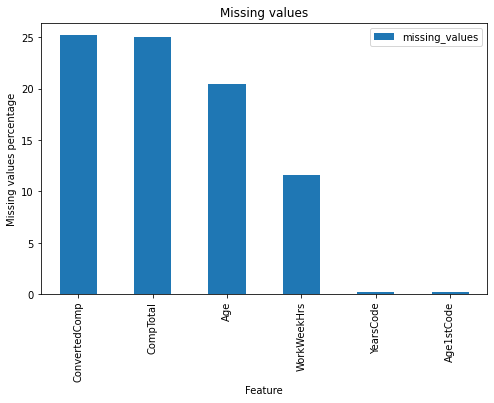

In [34]:
missing_num = find_missing_values(survey, numerical)

In [35]:
missing_num

,Feature,missing_values
0,ConvertedComp,25.164213
1,CompTotal,25.022774
2,Age,20.441578
3,WorkWeekHrs,11.612408
4,YearsCode,0.270892
5,Age1stCode,0.218152


**We can see that all features has missing value**s, the ConvertedComp and CompTotal features are the ones with the most missing values.

lets also see them in a bar graph.

Lets check the missing values for the categorical features now

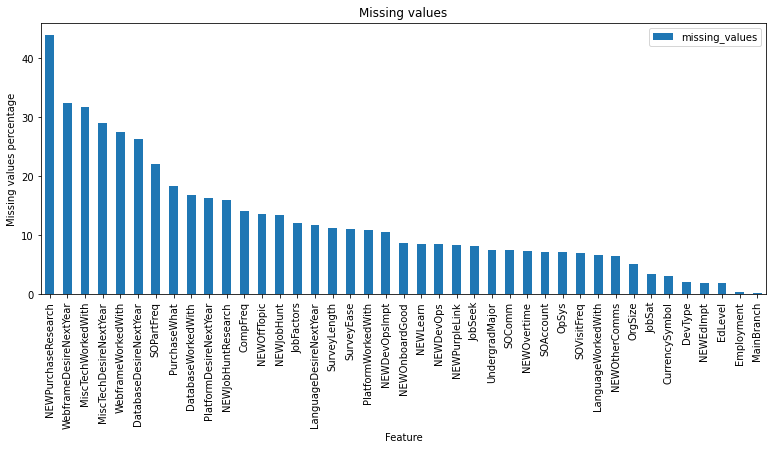

In [36]:
# let's output variables with NA and the percentage of NA

missing_cat = find_missing_values(survey, categorical, figsize=(13, 5))


In [37]:
missing_cat.head()

,Feature,missing_values
0,NEWPurchaseResearch,43.908520
1,WebframeDesireNextYear,32.425565
2,MiscTechWorkedWith,31.802273
3,MiscTechDesireNextYear,28.997459
4,WebframeWorkedWith,27.496764


**Also here, all features has missing values**, the NEWPurchaseResearch and PurchaseWhat are the ones with the most missing values.

#### Outliers: Numerical values

Lets check the distributions of the numerical values

In [38]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution#
# Let's define a function to do both

def plot_box_hist_dist(df, variables, figsize=(8,4)):
  for var in variables:
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    plt.subplot(1, 2, 2)
    fig = df[var].hist(bins=20)
    fig.set_ylabel('Number of respondents')
    fig.set_xlabel(var)
    plt.show()

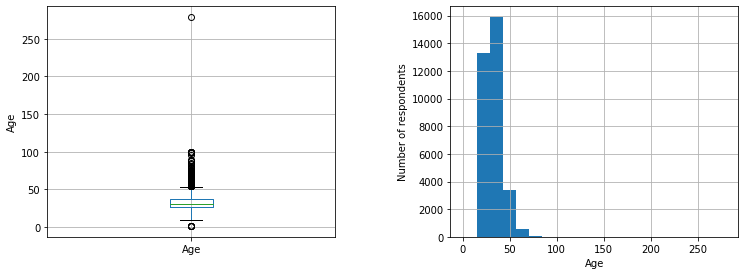

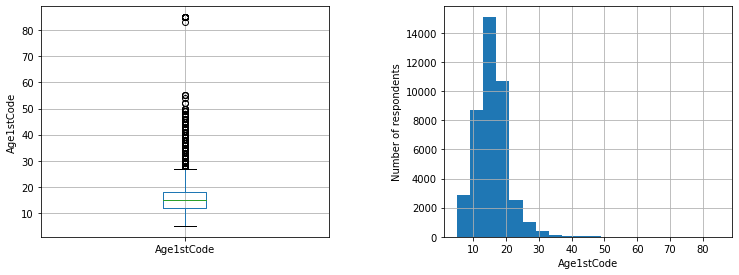

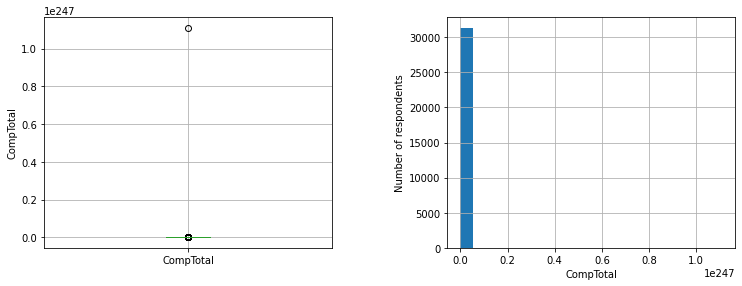

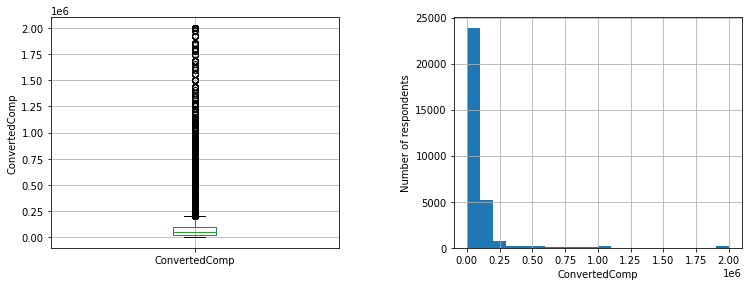

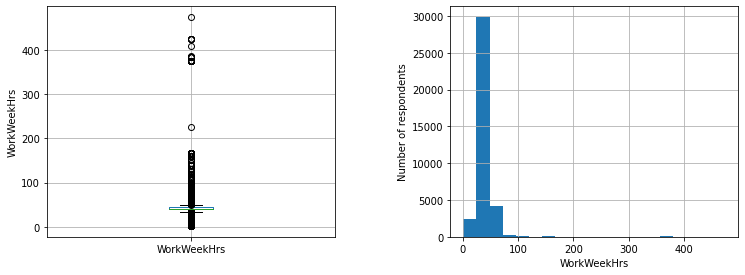

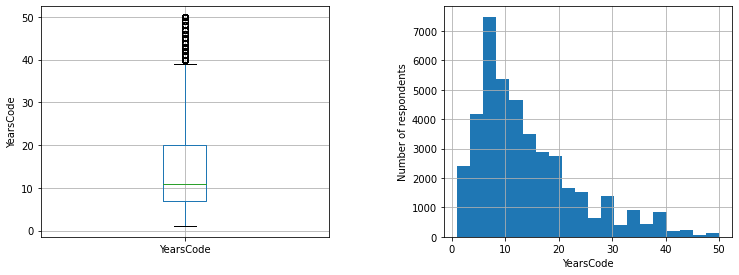

In [39]:
plot_box_hist_dist(survey, numerical)

**The majority of the continuous variables seem to contain outliers**. In addition, the majority of the variables are **not normally distributed**. As we are planning to build linear regression, we need to tackle these to improve the model performance. **To tackle the 2 aspects together, I will do discretisation for ConvertedComp and WorkWeekHRS**. I will follow discretisation with encoding of the intervals following the target mean.


#### Cardinality: Categorical values

Let's go ahead now and examine the cardinality of our categorical variables. That is, the number of different labels.

In [40]:
# plot number of categories per categorical variable

def plot_cat_bar(df, variables, figsize=(13,6)):
  df[categorical].nunique().plot.bar(figsize=figsize)
  plt.title('CARDINALITY: Number of categories in categorical variables')
  plt.xlabel('Categorical variables')
  plt.ylabel('Number of different categories');

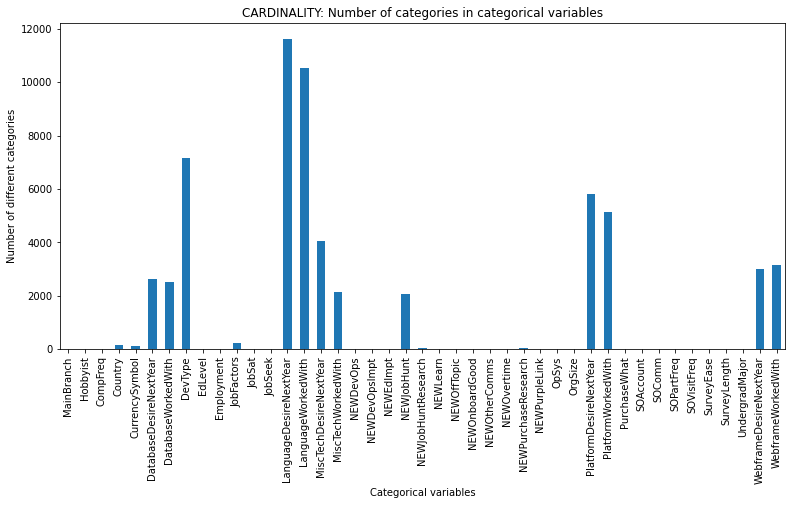

In [41]:
plot_cat_bar(survey, categorical)

We can see that some of the features has more than a thousand catigory, This is a **high cardinality** issue which we need to invistigate and solve

In [42]:
survey[categorical].nunique().sort_values(ascending=False)[:3]

LanguageDesireNextYear    11632
LanguageWorkedWith        10546
DevType                    7173
dtype: int64

Lets check LanguageDesireNextYear and JobFactors 

In [43]:
print(survey.LanguageDesireNextYear.head(3))

44395                        C#;Go;HTML/CSS;JavaScript;SQL
18068    Bash/Shell/PowerShell;Go;HTML/CSS;Kotlin;Pytho...
53323                                               Python
Name: LanguageDesireNextYear, dtype: object


In [44]:
print(survey.JobFactors.unique()[:3])

['Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Specific department or team I’d be working on'
 'Languages, frameworks, and other technologies I’d be working with;Office environment or company culture;Opportunities for professional development'
 'Diversity of the company or organization;Remote work options;Financial performance or funding status of the company or organization']


The two fields contain information about the roles held by respondents. Since the questions allow multiple answers, the columns contain lists of values separated by a semi-colon ;, making it a bit harder to analyze directly. 

Since we need to change this list of values to numerical represntation to prepare them for the analysis. I will map the number of values in each cell, for example, I will replace 'c++;python;java' with the number 3 as I believe its a value we can use for the prediction.



### Observations & Visualization



**This section is general observations and not related to the prediction. Just to see what kind of insights we can extract from the survey.**

#####Select Features for Visualization

The survey responses contain a wealth of information, I devided the questions into four catigories in order to choose what to focus on, then will select the features to show from each catigory which I think are relevent to task. This is just to see some of the information we can take from the survey

- Demographics: of the survey respondents and the global programming community

  - 'Age', 'Country',
'CurrencySymbol',
'EdLevel',
'UndergradMajor',

- Programming: Distribution of programming skills, experience, and preferences

  - 'YearsCodePro', 
'YearsCode', 
'WebframeWorkedWith', 
'WebframeDesireNextYear', 
'OpSys', 
'NEWLearn', 
'NEWDevOpsImpt', 
'NEWDevOps', 
'MiscTechWorkedWith', 
'MiscTechDesireNextYear', 
'LanguageWorkedWith', 
'LanguageDesireNextYear', 
'DatabaseWorkedWith', 
'DatabaseDesireNextYear', 
'Age1stCode', 
'Hobbyist' 

- Employment: preferences, and opinions

  - 'WorkWeekHrs', 'PurchaseWhat', 'OrgSize', 'NEWOvertime', 'NEWOnboardGood', 'NEWJobHuntResearch', 'NEWJobHunt', 'NEWEdImpt', 'JobSeek', 'JobSat', 'JobFactors', 'Employment', 'DevType', 'ConvertedComp', 'CompTotal', 'CompFreq', 'MainBranch'

- Platforms: StackOverflow related questions and other online platforms

  - 'SurveyLength', 'SurveyEase', 'SOVisitFreq', 'SOPartFreq', 'SOComm', 'SOAccount', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'NEWPurpleLink', 'NEWPurchaseResearch', 'NEWOtherComms', 'NEWOffTopic'

**Let's select a subset of columns for our analysis. I am not using the platform catigory as as they are relevent to StackOverflow itself**

In [45]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [46]:
selected_columns = [
    # Demographics
    'Country',
    'EdLevel',
    # Programming experience
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    # Employment
    'Employment'
]

In [47]:
len(selected_columns)

5

Now Let's extract a copy of the data from these columns into a new data to modify further without affecting the original data frame. These are general insights and not related to the predecion. So I will copy the whole dataset and not just the training

In [48]:
selected_features = raw_df[selected_columns].copy()
schema = schema_raw[selected_columns]

for i in schema:
  print(i)

Where do you live?
Which of the following best describes the highest level of formal education that you’ve completed?
Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)
Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)
Which of the following best describes your current employment status?


In [49]:
selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 64072 non-null  object
 1   EdLevel                 57431 non-null  object
 2   LanguageWorkedWith      57378 non-null  object
 3   LanguageDesireNextYear  54113 non-null  object
 4   Employment              63854 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


##### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [50]:
schema.Country

'Where do you live?'

In [51]:
survey.Country.nunique()

168

We can identify the countries with the highest number of respondents using the value_counts method.

In [52]:
top_countries = survey.Country.value_counts().head(15)
top_countries

United States         8972
India                 4673
United Kingdom        2892
Germany               2684
Canada                1456
France                1272
Brazil                1239
Netherlands            926
Poland                 890
Australia              885
Spain                  815
Italy                  756
Russian Federation     736
Sweden                 628
Turkey                 471
Name: Country, dtype: int64

We can visualize this information using a bar chart.

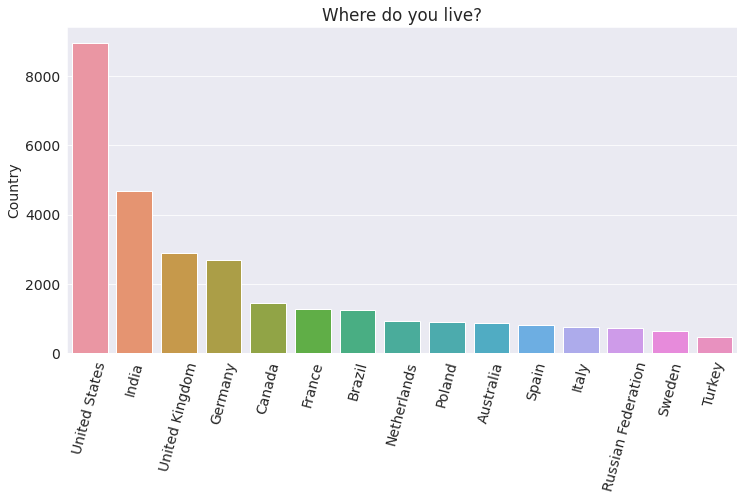

In [53]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have high English-speaking populations. We can already see that the survey may not be representative of the global programming community especially from non-English speaking countries.

##### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

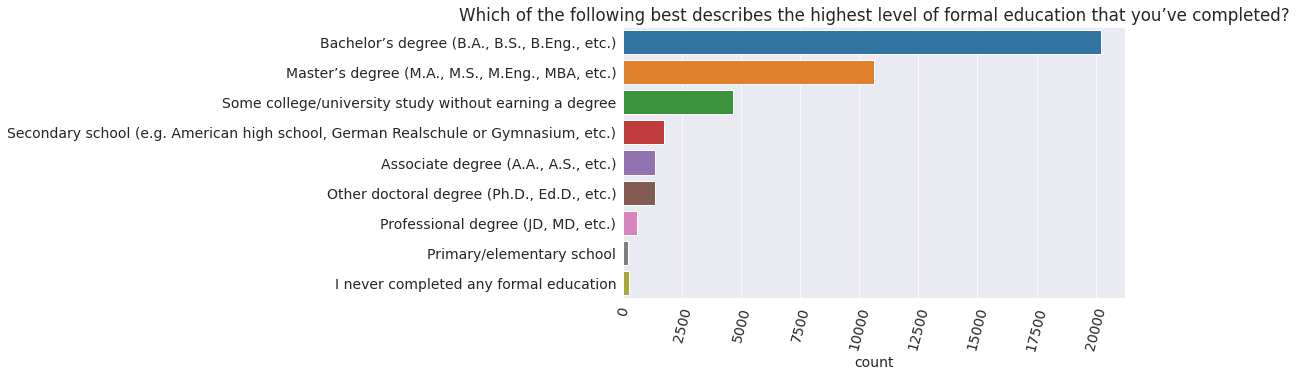

In [54]:
sns.countplot(y=survey.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

##### Languages Worked With

To answer, this we can use the `LanguageWorkedWith` column. Respondents were allowed to choose multiple options here.

In [55]:
survey.LanguageWorkedWith

44395                           C#;HTML/CSS;JavaScript;SQL
18068            Bash/Shell/PowerShell;HTML/CSS;Python;SQL
53323                         Bash/Shell/PowerShell;Python
9661                                     C;C++;Python;Rust
2763                           HTML/CSS;JavaScript;PHP;SQL
                               ...                        
26005                     Bash/Shell/PowerShell;Python;SQL
63086                                                  NaN
57566    Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL
58861                             HTML/CSS;Java;JavaScript
3283                                                    C#
Name: LanguageWorkedWith, Length: 41714, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

Let's define a helper function that turns a column containing lists of values into a data frame with one column for each possible option.

In [56]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [57]:
languages_worked_df = split_multicolumn(selected_features.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages, len(languages_worked_percentages)

(JavaScript               60.225563
 HTML/CSS                 56.128512
 SQL                      48.731791
 Python                   39.228371
 Java                     35.795287
 Bash/Shell/PowerShell    29.444160
 C#                       27.987465
 PHP                      23.280743
 TypeScript               22.615225
 C++                      21.264020
 C                        19.371403
 Go                        7.815578
 Kotlin                    6.931323
 Ruby                      6.276663
 Assembly                  5.511860
 VBA                       5.428088
 Swift                     5.269853
 R                         5.100759
 Rust                      4.543833
 Objective-C               3.630102
 Dart                      3.537022
 Scala                     3.183320
 Perl                      2.786181
 Haskell                   1.895720
 Julia                     0.805138
 dtype: float64, 25)

It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

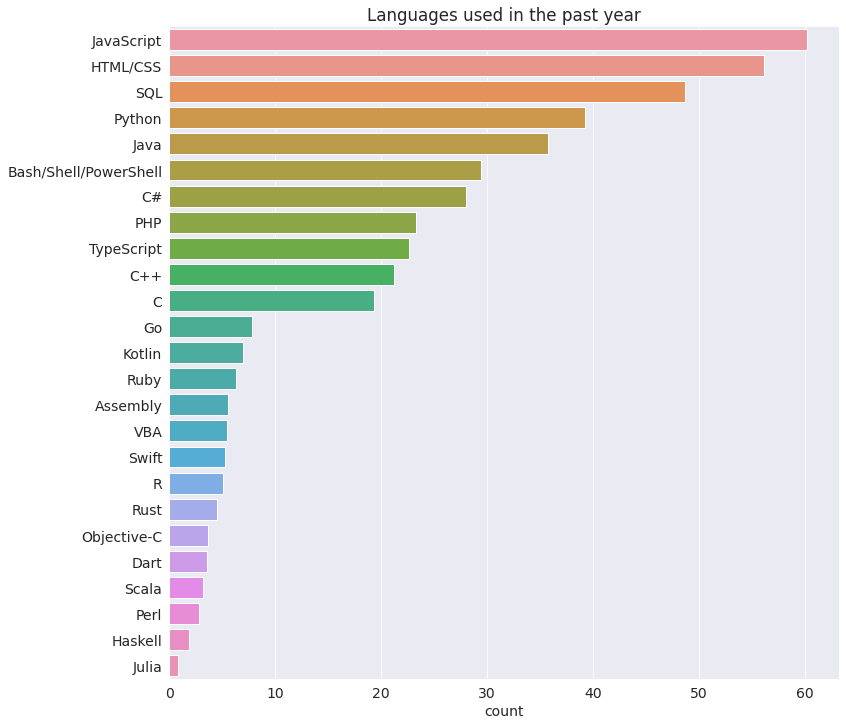

In [59]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java.

##### Languages to Learn Next Year

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [60]:
languages_interested_df = split_multicolumn(selected_features.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.392470
JavaScript               40.626115
HTML/CSS                 32.222584
SQL                      30.979972
TypeScript               26.605234
C#                       21.212826
Java                     20.576783
Go                       19.554459
Bash/Shell/PowerShell    18.193947
Rust                     16.386652
C++                      15.134733
Kotlin                   14.853943
PHP                      11.023720
C                         9.449124
Swift                     8.754130
Dart                      7.356386
R                         6.625712
Ruby                      6.490746
Scala                     5.375343
Haskell                   4.647772
Assembly                  3.830223
Julia                     2.576752
Objective-C               2.365772
Perl                      1.784024
VBA                       1.636649
dtype: float64

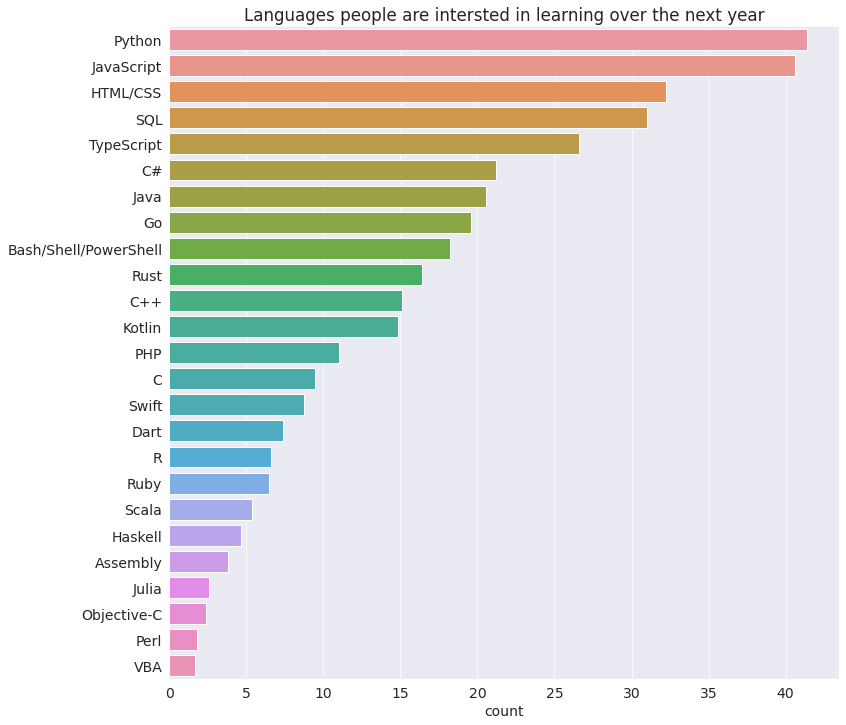

In [61]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Python seems to be the popular choice for languages programers interested in learning for the next year beating out Javascript.



##### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

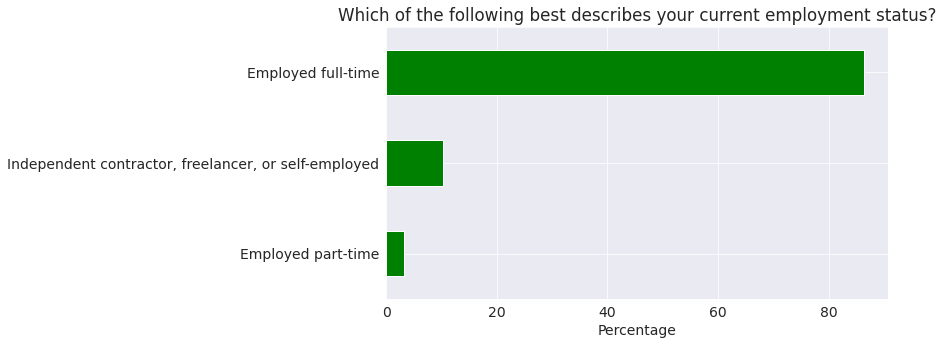

In [62]:
(survey.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.

##### Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2022, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

##Feature Engineering

###Introduction

**I will use Feature-engine library for most of feature engineering tasks and to build the data pipeline**

Feature-engine is an open source Python package which gained popularity and now supports transformations. Feature-engine works like to Scikit-learn, so it is easy to learn
Feature-engine allows you to implement specific engineering steps to specific feature subsets
Feature-engine can be integrated with the Scikit-learn pipeline allowing for smooth model building.

From previous section, we saw that the data is not ready for modeling. in this section, we will clean and prepare the data as in the following steps:

- Build a function to clean the data to prepare it for the data pipeline

- Build a data PipeLine to do the following:
  - For the numerical features:
    - Fill the missing values 
    - Deal with the outliers by discretisation

  - For the categorical values:
    - Fill the missing values
    - Convert the categorical features to numerical using one of the ecoding methods.
  - Feature scaling to prepare the model for training


### Preparing the data

#### Buidling the data pipeLine

In [63]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce
from feature_engine.outliers import Winsorizer
from feature_engine.imputation import DropMissingData

The function below will do the following:
- Drop 'CompFreq', 'CompTotal' and 'CurrencySymbol' as they are replaced with 'ConvertedComp'
- Convert 'Age1stCode', 'YearsCode' and 'YearsCodePro' to numerical features by mapping the string values to inter or float and change the type to numerical
- Dealing with the high cardinality by replacing the multi answers features to the number of answers

In [64]:
def clean_data(df, target, string_to_int, obj_to_num_features, multi_values_cat):
  for var in obj_to_num_features:
    df[var] = df[var].replace(string_to_int).astype(float)
    target = target.replace(string_to_int).astype(float)
  for var in multi_values_cat:
    df[var] = (df[var].str.count(';') + 1).astype('O')

  return df, target


In [65]:
#drop_col = ['CompFreq', 'CompTotal', 'CurrencySymbol' ]
string_to_int={'Younger than 5 years': 5, 'Older than 85': 85, 'Less than 1 year': 1, 'More than 50 years': 50, 'Less than 1 year': 1, 'More than 50 years': 50}
obj_to_num_features = ['Age1stCode', 'YearsCode']
multi_values_cat = ['LanguageDesireNextYear', 'LanguageWorkedWith', 'DevType', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'MiscTechDesireNextYear', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'MiscTechWorkedWith', 'NEWJobHunt','NEWJobHuntResearch', 'NEWPurchaseResearch','JobFactors']

X_train, y_train = clean_data(X_train_full, y_train_full, string_to_int, obj_to_num_features, multi_values_cat)
X_test, y_test = clean_data(X_test_full, y_test_full, string_to_int, obj_to_num_features, multi_values_cat)

In [66]:
X_train.head(1)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencySymbol,DatabaseDesireNextYear,...,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WorkWeekHrs,YearsCode
44395,I am a developer by profession,No,30.0,15.0,Monthly,2700.0,35028.0,Germany,EUR,2.0,...,"Yes, somewhat",Daily or almost daily,Daily or almost daily,Easy,Appropriate in length,"Information systems, information technology, o...",3.0,3.0,40.0,6.0


Strategy for the numerical variables:
- **Imputation technique to use: additional variable with NA + median imputation**. I chose the median to avoid the bias caused by outliers 

- For ConvertedComp and WorkWeekHRS. **Perform a discretisation to deal with outliers with encoding of the intervals following the target mean.

- For 'Age', 'Age1stCode', 'YearsCode', **I will use the IQR-proximity-rule by capping them as one of the solutions.**


Strategy for the categorical variables:
- Imputation technique to use: **Add missing label to categorical variables**
- Will group the **rare categories** (categories with low frequency). This will help identifying them in the test set. If the category is rare, there is a good possibility it is not included in the test set after splitting the data.
- will use the **ordinal encoding** to convert them to numerical values for the prediction

In [67]:
survey_pipe = Pipeline([

      # missing data imputation for the target by dropping them
    #('missing_target', DropMissingData(variables=['YearsCodePro'], missing_only=False)),
      # missing data imputation for numerical features
    ('missing_ind', mdi.AddMissingIndicator(
        variables=numerical)),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=numerical)),
                       
      # missing data imputation for categorical features    
    ('imputer_cat', mdi.CategoricalImputer(variables=categorical)),

      #Capping outliers based on IQR proxemty rule for ['Age', 'Age1stCode', 'YearsCode', 'WorkWeekHrs']
    ('Capping-proximity-rule', Winsorizer(capping_method='iqr', tail='both', fold=1.5,
                                          variables=['Age', 'Age1stCode', 'YearsCode', 'WorkWeekHrs'])),
                       
        # discretisation for ['CompTotal', 'ConvertedComp']
    ('discretisation', dsc.EqualFrequencyDiscretiser(
        q=5, return_object=True, variables=['CompTotal', 'ConvertedComp'])),   

    # rare label encoding categorical encoding
    ('rare_label_enc', ce.RareLabelEncoder(
        tol=0.05, n_categories=0, variables=categorical)),

    #categorical encoding for the discretisated features using order target mean method
    ('encoding', ce.OrdinalEncoder(
        encoding_method='ordered', variables=['CompTotal', 'ConvertedComp'])),       

    #categorical encoding using order target mean method
    ('categorical_enc', ce.OrdinalEncoder(
        encoding_method='ordered', variables=categorical)),

    # feature Scaling
    #('scaler', StandardScaler()),
])

In [68]:
# let's fit the pipeline
survey_pipe.fit(X_train, y_train)

X_train_transformed = survey_pipe.transform(X_train)
X_test_transformed = survey_pipe.transform(X_test)

In [69]:
X_train_transformed.head(1)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencySymbol,DatabaseDesireNextYear,...,WebframeDesireNextYear,WebframeWorkedWith,WorkWeekHrs,YearsCode,Age_na,Age1stCode_na,CompTotal_na,ConvertedComp_na,WorkWeekHrs_na,YearsCode_na
44395,0,1,30.0,15.0,0,0,1,2,2,4,...,2,3,40.0,6.0,0,0,0,0,0,0


####Exploring the data after transformation

#####Missing values

In [70]:
find_missing_values(X_train_transformed, X_train_transformed.columns)

There is no missing values


**There is no missing values now**

##### Outliers

Let's check the new distribution and plotbox for the numerical values

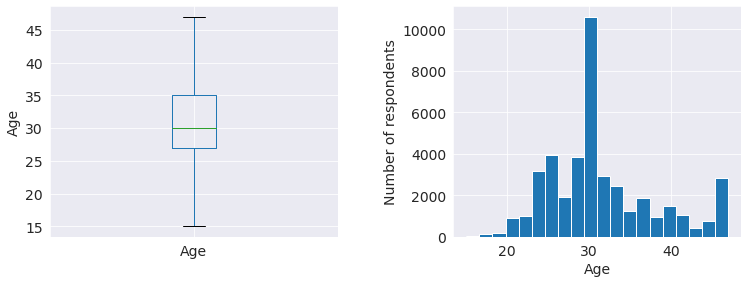

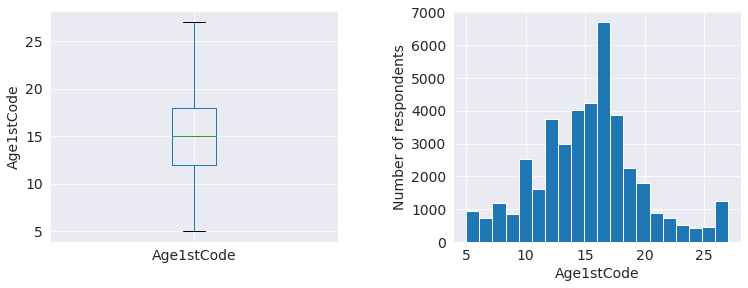

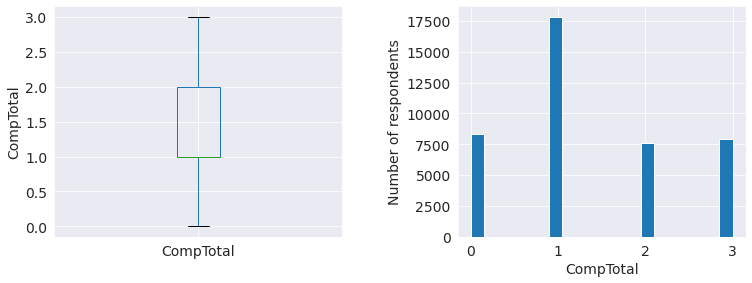

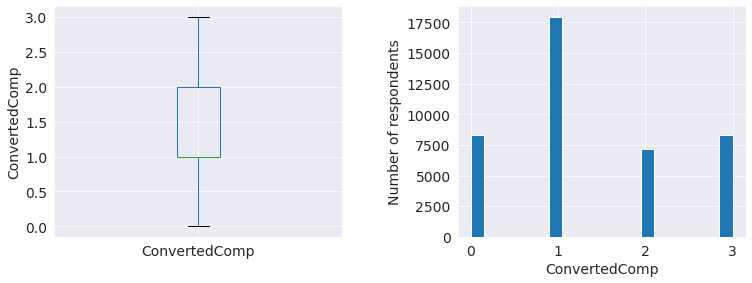

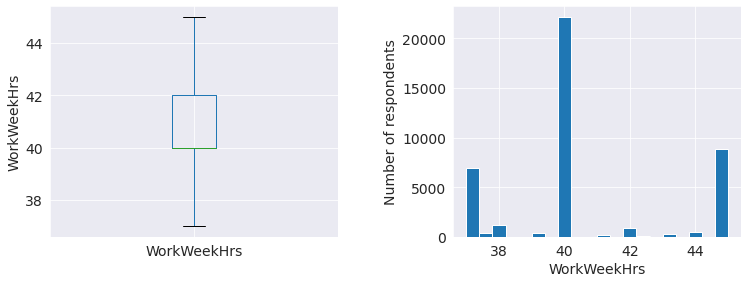

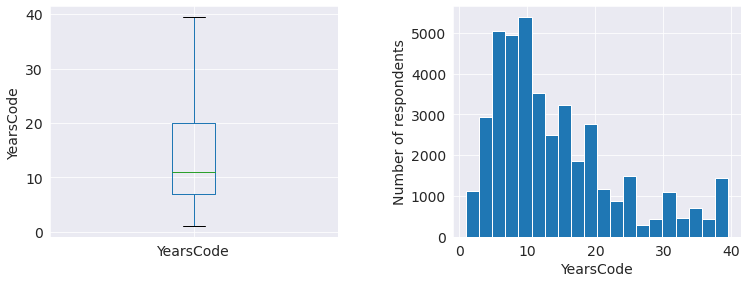

In [71]:
plot_box_hist_dist(X_train_transformed, numerical)

**We can see that 'Age', 'Age1stCode', 'YearsCode', 'WorkWeekHrs' don't have outliers anymore and Converted Comp, CompTotal are discrete elements now**

#####Cardinality & Monotoncity: Categorical values

######Cardinality

Let's go ahead now and examine the cardinality of our categorical variables after the transformation

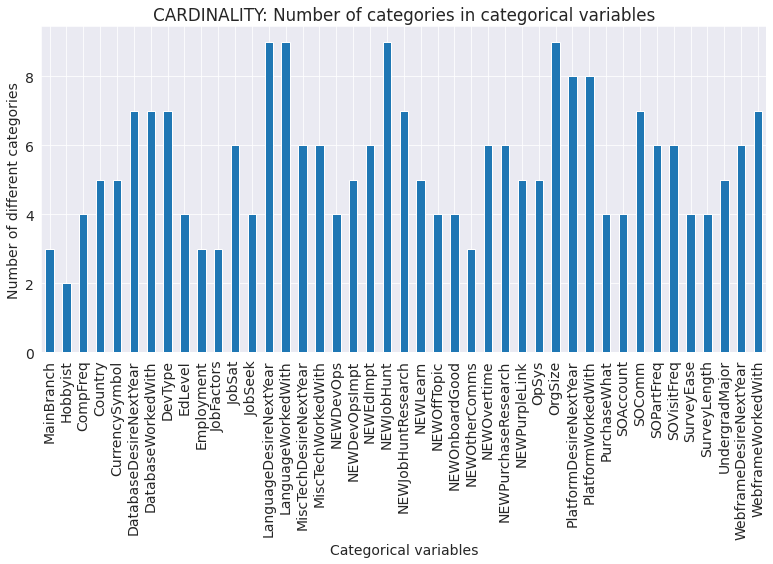

In [72]:
plot_cat_bar(X_train_transformed, categorical)

**All categories are within 10 categories now, which doesn't indicate a high cardinalty issue**

######Monotoncity

Let's check the relationship between some of the categorical values and the target after the Ordered-Integer-Encoding

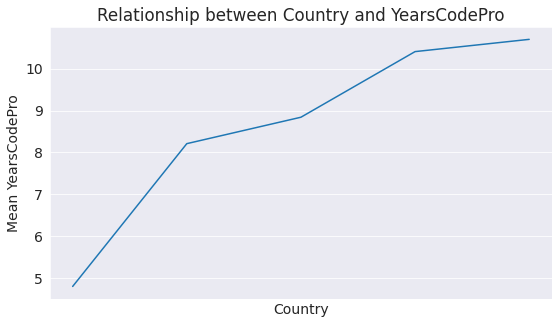

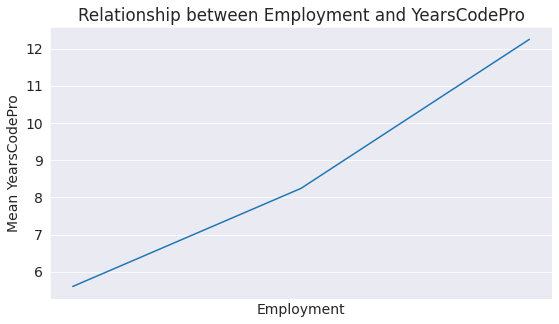

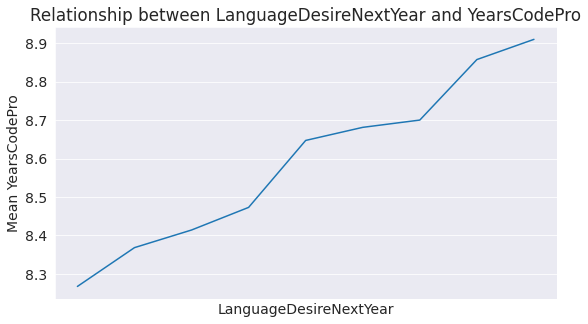

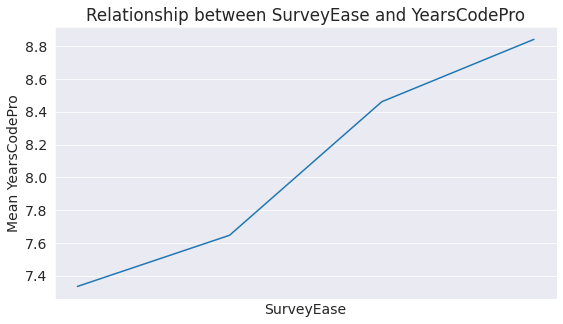

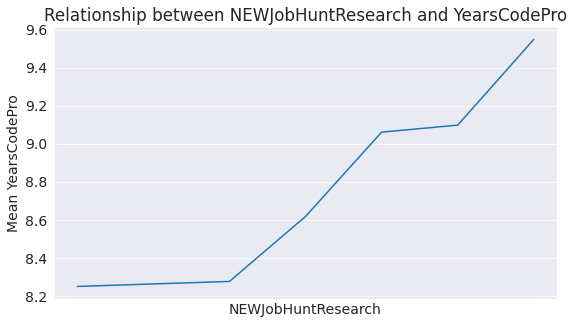

In [73]:
X_train_with_target = X_train_transformed.copy()
X_train_with_target['YearsCodePro'] = y_train

random.seed(32)
random_categories_encoded = random.choices(categorical, k=5)

plot_monot_hist_dist(X_train_with_target, random_categories_encoded)

**We see from the plots above that the relationship between the categories and the target is now monotonic**, and for the first 2 variables, almost linear, which helps improve linear models performance. We need to be careful though as this method may cause over-fitting.

######Corrolation

In [74]:
X_train_with_target = X_train.copy()
X_train_with_target['YearsCodePro'] = y_train

corr_matrix = X_train_with_target.corr()
corr_matrix["YearsCodePro"].sort_values(ascending=False)

YearsCodePro     1.000000
YearsCode        0.883187
Age              0.829342
ConvertedComp    0.115233
WorkWeekHrs      0.051394
CompTotal        0.000000
Age1stCode      -0.159863
Name: YearsCodePro, dtype: float64

We can see that the highest corrolation is with the YearsCode which makes since as I mentioned before.

# Predictive Model & Featue Selection

At last! I framed the problem, I got the data and explored it, I sampled a training set and a test set, and wrote a preprocessing pipeline to automatically clean up and prepare the data for machine learning
algorithms. We are now ready to select and train a machine learning model.

## Train and Evaluate on the Training Set

Let's take a copy for the clean Training and Testing sets. Then split the training set to Train and Validation set as we consider the test set a data we don't have and we should only evaluate the model on the test as the last step before model deployment.

In [75]:
# Let's take a copy for the Trasformed Training and Testing sets.
# Split the training set to Train, Valid
# Test set is consider as a data 

X_train_f = X_train_transformed.copy()
y_train_f = y_train.copy()
X_test = X_test_transformed.copy()

X_train, X_valid, y_train, y_valid = train_test_split(X_train_f, 
                                                      y_train_f,
                                                      test_size=0.1,
                                                      random_state=0)


I will create a function to fit, make prediction and evaluate models using the following metrics:

- Mean absolute error (MAE): The average difference between model's predictions and the actual numbers.

- Root mean square error (RMSE): The square root of the average of squared differences between model's predictions and the actual numbers.

- R-squared (R2): Corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model.



In [76]:
def train_model(model, scaler=None, X_train=X_train, X_valid=X_valid, y_train=y_train, y_valid=y_valid):
    from sklearn.metrics import mean_squared_log_error, mean_absolute_error
    import time
    start = time.time()

    if scaler:
      X_train = scaler.fit_transform(X_train, y_train)
      X_valid = scaler.fit_transform(X_valid, y_valid)

    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)

    train_scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              'Training RMSE': sqrt(mean_squared_error(y_train, train_preds)),
              "Training R^2": model.score(X_train, y_train)}

    valid_scores = {"Valid MAE": mean_absolute_error(y_valid, val_preds),
              'Valid RMSE': sqrt(mean_squared_error(y_valid, val_preds)),
              "Valid R^2": model.score(X_valid, y_valid)}

    stop = time.time()
    train_time = {'time_spent': stop - start}
    return train_scores, valid_scores, train_time, train_preds, val_preds

### Linear Regression

**Let's start by training a very basic linear regression mdel to get started.**

Lets start by fitting the data to the linear model as start, just to have a feeling about the predictions
Then will see what to improve

In [77]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
scaler = StandardScaler()

In [78]:
lin_train_scores, lin_valid_scores, lin_time, lin_train_preds, lin_val_preds = train_model(lin_reg, scaler)

#Let's check the scores

lin_train_scores, lin_valid_scores, lin_time

({'Training MAE': 2.3930789444803113,
  'Training RMSE': 3.520947257080488,
  'Training R^2': 0.8008046911331292},
 {'Valid MAE': 2.4027356724340616,
  'Valid RMSE': 3.547390661451618,
  'Valid R^2': 0.786284624836347},
 {'time_spent': 0.14732575416564941})

Well! that's a good start, let's look at the first 5 predictions to see how the model perform

In [79]:
lin_train_preds[:5].round(1)

array([ 8.6,  3.1, 10.6,  7.9,  4.8])

In [80]:
y_train[:5]

18260     9.0
40748     6.0
28244    15.0
48385     7.0
11087     7.0
Name: YearsCodePro, dtype: float64

In [81]:
# computes the error ratios discussed in the book
error_ratios = lin_train_preds[:5].round() / y_train[:5] -1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

0.0%, -50.0%, -26.7%, 14.3%, -28.6%


- Well, it works, but not always: the first prediction is alomst the same while the other predictions are variant: 
the second one 50% and the third one by 27%, the model is performing well but its still underfitting the training data.

- When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm with better features, or to reduce the constraints on the model. This model is not regularized, which rules out the last option. 

- We could try reducing the number of features as some of them may cause noise rather than usefull information. but first I need to try a more complex model to see how it does.

### Decision Tree Regressor

I will try a DecisionTreeRegressor, as this is a fairly powerful model capable of finding complex nonlinear relationships in the data

In [82]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)

tree_train_scores, tree_valid_scores, tree_time, tree_train_preds, tree_val_preds = train_model(tree_reg, scaler)
#Let's check the scores"
tree_train_scores, tree_valid_scores, tree_time

({'Training MAE': 0.0, 'Training RMSE': 0.0, 'Training R^2': 1.0},
 {'Valid MAE': 2.8391658676893576,
  'Valid RMSE': 4.374022284943807,
  'Valid R^2': 0.6750775544389158},
 {'time_spent': 0.7567031383514404})

The taining score is perfect which means that the model has badly overfit the data. We need to evaluate the model using Cross-Validation

In [83]:
from sklearn.model_selection import cross_val_score

tree_mae = -cross_val_score(tree_reg, X_train, y_train,
                              scoring="neg_mean_absolute_error", cv=10)
tree_mae

array([3.02689747, 2.85486019, 2.8841236 , 2.91422483, 2.87559936,
       2.97549281, 3.01145445, 2.8902504 , 2.8689398 , 2.88066063])

In [84]:
pd.Series(tree_mae).describe()

count    10.000000
mean      2.918250
std       0.062729
min       2.854860
25%       2.876865
50%       2.887187
75%       2.960176
max       3.026897
dtype: float64

Now the decision tree doesn’t look as good as it did earlier. In fact, it seems
to perform almost as the linear regression model! 

We know there’s an overfitting problem because the training error is low (actually zero) while the validation error is higher. 

We can try to hypertune it specially the **max_depth** hyperparameter but we will leave this step after evaluating multiple models.

Let’s try another model now: the RandomForestRegressor.

### Random Forest Regressor

Random Forests are ensemble models which work by training many decision trees on random subsets of the features, then averaging out their predictions. This should be capable of boosting the performance of the model

In [85]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)

forest_train_scores, forest_valid_scores, forest_time, forest_train_preds, forest_val_preds = train_model(forest_reg, scaler)

#Let's check the scores
forest_train_scores, forest_valid_scores, forest_time

({'Training MAE': 0.7606403494752544,
  'Training RMSE': 1.1832926330526095,
  'Training R^2': 0.9775019753236991},
 {'Valid MAE': 2.042094918504314,
  'Valid RMSE': 3.1677477625064805,
  'Valid R^2': 0.8295806453932494},
 {'time_spent': 41.80173444747925})

In [86]:
forest_mae = -cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_absolute_error", cv=10)
forest_mae

array([2.09346738, 2.03711052, 2.04911561, 2.07355354, 1.98843101,
       2.03100959, 2.0550293 , 2.02966169, 2.04596963, 2.0541609 ])

This is much better: random forests look very promising! However, there’s still quite some overfitting going on. Possible solutions are to
simplify the model, constrain it (i.e., regularize it),or get a lot more training data. 

Before moving to the Fine tuning step. We can also try out many other models from various categories of machine learning algorithms (e.g., Regularized Linear Models, Support Vector Machines with different
kernels, and possibly a neural network if there is time left).


### XGBoost Regression

XGBoost is also ensemble model which works well with Scikit-Learn, has a similar API, and can in most cases be used just like a Scikit-Learn model. Also, its very popular powerfull

In [87]:
from xgboost import XGBRegressor

xgboost_reg = XGBRegressor()
xgboost_train_scores, xgboost_valid_scores, xgboost_time,  xgboost_train_preds, xgboost_val_preds = train_model(xgboost_reg, scaler)

#Let's check the scores
xgboost_train_scores, xgboost_valid_scores, xgboost_time

[20:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'Training MAE': 2.0501659668850647,
  'Training RMSE': 3.08566343224588,
  'Training R^2': 0.84701206771001},
 {'Valid MAE': 2.0787063191143917,
  'Valid RMSE': 3.228538638142253,
  'Valid R^2': 0.8229769956367279},
 {'time_spent': 4.903915643692017})

XGBoost is very promising as it has the best result so far, less overfitting than random forest.

### Regularized Linear Models

A good way to reduce overfitting is to
regularize the model: the fewer degrees of freedom it has, the harder it will be for it to overfit the data. 
For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at ridge regression, lasso regression which implement two different ways to constrain
the weights.

#### Ridge

It keeps the model weights as small as possible by adding a penalty to the MSE.

In [88]:
from sklearn.linear_model import Ridge

# Let's try it with different penalties
alpha = [0.1, 1, 10, 100]
for i in alpha:
  ridge_reg = Ridge(alpha=i, solver="cholesky")
  rid_train_scores, rid_valid_scores, rid_time, rid_train_preds, rid_val_preds = train_model(ridge_reg, scaler)
  print(f'for alpha {i} train_scores: {rid_train_scores}\n ' ), print(f'valid_scores: {rid_valid_scores}\n')

for alpha 0.1 train_scores: {'Training MAE': 2.393077625636313, 'Training RMSE': 3.520947257311808, 'Training R^2': 0.8008046911069557}
 
valid_scores: {'Valid MAE': 2.4027337014316945, 'Valid RMSE': 3.5473887859779545, 'Valid R^2': 0.7862848508150958}

for alpha 1 train_scores: {'Training MAE': 2.3930657760215883, 'Training RMSE': 3.5209472800523187, 'Training R^2': 0.8008046885338964}
 
valid_scores: {'Valid MAE': 2.402715962135468, 'Valid RMSE': 3.547371918288171, 'Valid R^2': 0.7862868832239945}

for alpha 10 train_scores: {'Training MAE': 2.3929494732386183, 'Training RMSE': 3.520949408490765, 'Training R^2': 0.800804447703771}
 
valid_scores: {'Valid MAE': 2.4025385540693973, 'Valid RMSE': 3.547204355469685, 'Valid R^2': 0.7863070725513356}

for alpha 100 train_scores: {'Training MAE': 2.3919993573717413, 'Training RMSE': 3.5210912848009395, 'Training R^2': 0.8007883942499585}
 
valid_scores: {'Valid MAE': 2.4008660109409403, 'Valid RMSE': 3.5456260375372506, 'Valid R^2': 0.78649

Its almost the same results as the linear regression. 

Ridge regularisation does not shrink coefficients to zero as it uses L2 norm which means that it doesn't exclude features 

In [89]:
# Let's register one of the results for later
ridge_reg = Ridge(alpha=0.1, solver="cholesky")

ridge_train_scores, ridge_valid_scores, ridge_time, ridge_train_preds, ridge_val_preds = train_model(ridge_reg, scaler, X_train, X_valid)
#Let's check the scores
ridge_train_scores, ridge_valid_scores, ridge_time

({'Training MAE': 2.393077625636313,
  'Training RMSE': 3.520947257311808,
  'Training R^2': 0.8008046911069557},
 {'Valid MAE': 2.4027337014316945,
  'Valid RMSE': 3.5473887859779545,
  'Valid R^2': 0.7862848508150958},
 {'time_spent': 0.07209134101867676})

#### Lasso

*Least Absolute Shrinkage and Selection Operator regression* consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and avoid overfitting.

In linear model regularization, the penalty is applied to the coefficients that multiply each of the predictors. The Lasso regularization or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, those features can be removed from the model.

In [90]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1, random_state=10)

lasso_train_scores, lasso_valid_scores, lasso_time, lasso_train_preds, lasso_val_preds = train_model(lasso_reg, scaler, X_train, X_valid)
#Let's check the scores
lasso_train_scores, lasso_valid_scores, lasso_time

({'Training MAE': 2.3806762189026354,
  'Training RMSE': 3.5501947816508177,
  'Training R^2': 0.7974816268472973},
 {'Valid MAE': 2.377210563147232,
  'Valid RMSE': 3.5656363765635892,
  'Valid R^2': 0.7840805157767443},
 {'time_spent': 0.0889737606048584})

**Let's do some feature selection using Lasso regression.**

In [91]:
from sklearn.feature_selection import SelectFromModel

# Let' try different values of alpha
alpha = [0.1, 0.5, 1, 10]
for i in alpha:
  sel_ = SelectFromModel(Lasso(alpha=i, random_state=10))
  sel_.fit(scaler.transform(X_train), y_train)
  selected_feat = X_train.columns[(sel_.get_support())]
  print(f'for alpha {i}, selected features: {len(selected_feat)}')
  print(f'for alpha {i}, features with coefficients shrank to zero: {np.sum(sel_.estimator_.coef_ == 0)}')

for alpha 0.1, selected features: 17
for alpha 0.1, features with coefficients shrank to zero: 38
for alpha 0.5, selected features: 3
for alpha 0.5, features with coefficients shrank to zero: 52
for alpha 1, selected features: 2
for alpha 1, features with coefficients shrank to zero: 53
for alpha 10, selected features: 0
for alpha 10, features with coefficients shrank to zero: 55


Let's see the features left after regulaization with alpha=0.1 as only 17 features left out of 55. which means 38 features were elemenated. 

In [92]:
sel_ = SelectFromModel(Lasso(alpha=0.1, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)
selected_feat = X_train.columns[(sel_.get_support())]

selected_feat

Index(['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompTotal',
       'ConvertedComp', 'DatabaseWorkedWith', 'DevType', 'Employment',
       'NEWJobHunt', 'NEWPurpleLink', 'PurchaseWhat', 'UndergradMajor',
       'YearsCode', 'Age_na', 'ConvertedComp_na', 'YearsCode_na'],
      dtype='object')

**Let's evaluate the model with these features alone** 

In [93]:
X_train_lasso = pd.DataFrame(sel_.transform(scaler.transform(X_train)))
X_valid_lasso = pd.DataFrame(sel_.transform(scaler.transform(X_valid)))

In [94]:
lasso_reg = Lasso(alpha=0.1, random_state=10)

red_lasso_train_scores, red_lasso_valid_scores, red_lasso_time, red_lasso_train_preds, red_lasso_val_preds = train_model(lasso_reg, scaler, X_train_lasso, X_valid_lasso)
#Let's check the scores
red_lasso_train_scores, red_lasso_valid_scores, red_lasso_time

({'Training MAE': 2.380676747121139,
  'Training RMSE': 3.550194914927052,
  'Training R^2': 0.7974816116419983},
 {'Valid MAE': 2.377211505356229,
  'Valid RMSE': 3.5656371199526156,
  'Valid R^2': 0.7840804257439004},
 {'time_spent': 0.03827261924743652})

**the feature space is reduced quite a bit, without losing model performance dramatically. In the final chosen model, I will try train it using the full features and the reduced features**

### Support Vector Machines: SVR

SVM regression tries to fit as many instances as possible within specific borders while limiting margin violations (i.e., instances off the borders). The width of the borders are controlled by a hyperparameter ϵ. 

In [95]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=0.3, random_state=42)

svm_train_scores, svm_valid_scores, svm_time, svm_train_preds, svm_val_preds = train_model(svm_reg, scaler, X_train, X_valid)
#Let's check the score

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [96]:
svm_train_scores, svm_valid_scores, svm_time

({'Training MAE': 2.3609299642135917,
  'Training RMSE': 3.5575792203945618,
  'Training R^2': 0.796638270398381},
 {'Valid MAE': 2.3527838311609295,
  'Valid RMSE': 3.564107051766357,
  'Valid R^2': 0.7842656946181782},
 {'time_spent': 5.71661639213562})

**Next step is tweaking the hyperparameters.**

### Model Comparsion

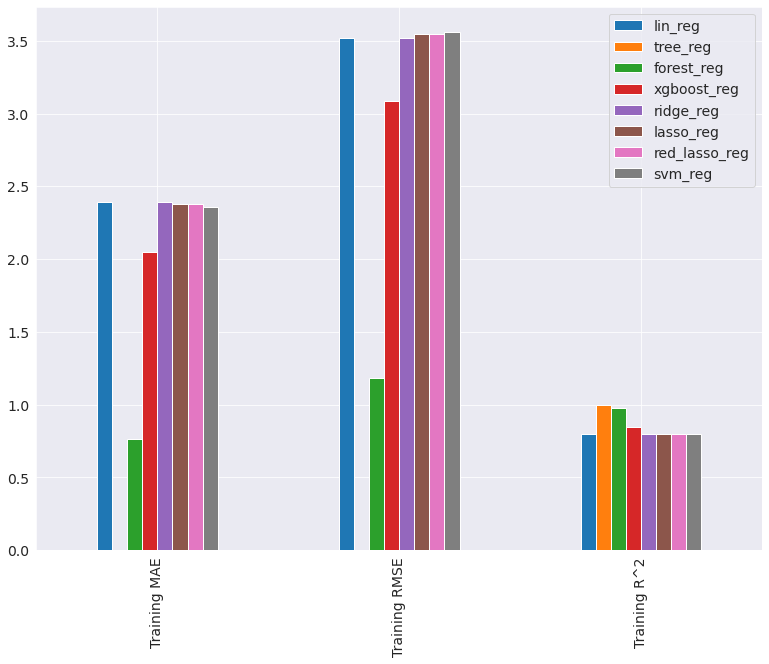

In [97]:
compare_train_metrics = pd.DataFrame({"lin_reg": lin_train_scores,
                                "tree_reg": tree_train_scores,
                                "forest_reg": forest_train_scores,
                                'xgboost_reg': xgboost_train_scores,
                                'ridge_reg': ridge_train_scores, 
                                'lasso_reg': lasso_train_scores,
                                'red_lasso_reg': red_lasso_train_scores,
                                'svm_reg': svm_train_scores
                                })

compare_train_metrics.plot.bar(figsize=(13, 10));

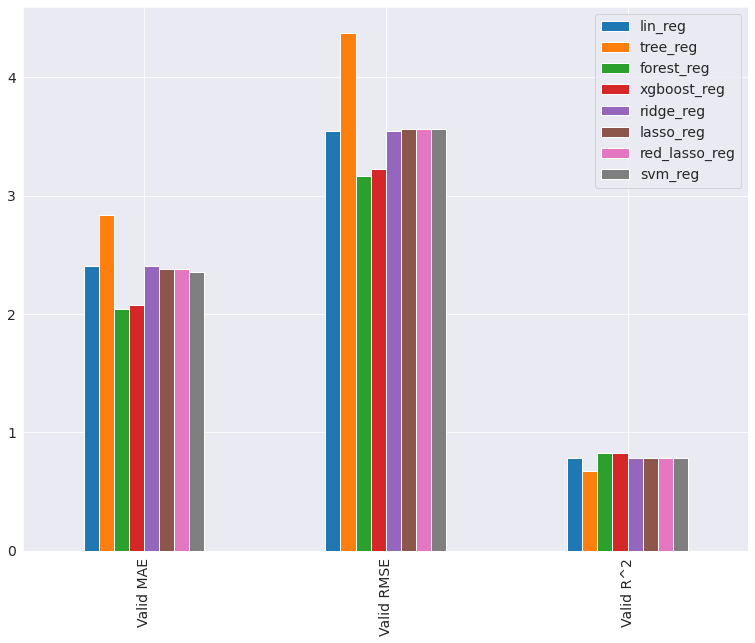

In [98]:
compare_valid_metrics = pd.DataFrame({"lin_reg": lin_valid_scores,
                                "tree_reg": tree_valid_scores,
                                "forest_reg": forest_valid_scores,
                                'xgboost_reg': xgboost_valid_scores,
                                'ridge_reg': ridge_valid_scores,
                                'lasso_reg': lasso_valid_scores,
                                'red_lasso_reg': red_lasso_valid_scores,
                                'svm_reg': svm_valid_scores
                                })

compare_valid_metrics.plot.bar(figsize=(13, 10));

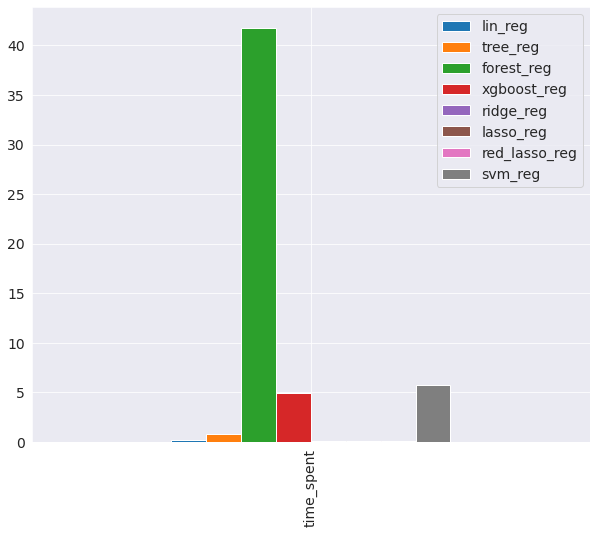

In [99]:
compare_time = pd.DataFrame({"lin_reg": lin_time,
                                "tree_reg": tree_time,
                                "forest_reg": forest_time,
                                'xgboost_reg': xgboost_time,
                                'ridge_reg': ridge_time, 
                                'lasso_reg': lasso_time,
                                'red_lasso_reg': red_lasso_time,
                                'svm_reg': svm_time
                                })

compare_time.plot.bar(figsize=(10, 8));

- **All the models have an R^2 score between (0.77-0.83) on both train and test set excepts for RandomForest and Decision Tree Regressor as they both overfitted the data.**

- **Decision trees models: RandomForest and XGBoost had the best results, RandomForest overfitted the data and took more time, probably because we did'nt hypertune any if its paramaters. XGBoost provided the best result with less time and much less overfitting**

- **Other models perfomed well too, so if we are looing for something fast and give up on little performace, we can use one of the very fast methos, LinearRegression or Lasso for example.**

## Fine-Tuning of the model

Now that we have a shortlist of promising models. We
need to fine-tune the chosen one.

I will Fine tune **XGBoost Regression** using RandomizedSearchCV. Usually I try more than one model but for the limitation of time I will choose one.

### RandomizedSearchCV

One option would be to fiddle with the hyperparameters manually to find a good combination of hyperparameter values. This would be very tedious work and time consuming.

Instead, I will use Scikit-Learn’s GridSearchCV class to search for the best hyperparameters. It will use cross-validation to evaluate all the possible combinations of hyperparameter values.

The following code searches for the best combination of hyperparameter values for the RandomForestRegressor:
The hyperparameters are taken from *HandsOn Machine Learning with ScikitLearn Keras and TensorFlow 3rd Edition book*

####XGBoost Regression

In [100]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

xgb_grid = {
    'regressor__n_estimators': [100, 500, 1000, 2000],
    'regressor__max_depth': [3, 6, 9, 12],
    'regressor__learning_rate': [0.01, 0.03, 0.05, 0.1]
}

pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', XGBRegressor())])

xgb_model = RandomizedSearchCV(estimator=pipeline,
            param_distributions=xgb_grid,
            cv=3, 
            n_iter=5,
            scoring = 'neg_root_mean_squared_error',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

xgb_model.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[20:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 43.6 s, sys: 403 ms, total: 44 s
Wall time: 7min 18s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('regressor', XGBRegressor())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'regressor__learning_rate': [0.01, 0.03,
                                                                     0.05,
                                                                     0.1],
                                        'regressor__max_depth': [3, 6, 9, 12],
                                        'regressor__n_estimators': [100, 500,
                                                                    1000,
                                                                    2000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=5)

In [101]:
model_2 = xgb_model.best_estimator_

In [102]:
model_2

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(learning_rate=0.01, max_depth=6,
                              n_estimators=500))])

In [103]:
model_2.score(X_valid, y_valid)

0.8307998831018909

In [104]:
model_2.score(X_test, y_test)

0.8476378171314125

I will go with XGBoost model as its slightly better, 

###Confidence interval 

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

final_predictions = model_2.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_mae = mean_absolute_error(y_test, final_predictions)

print(final_rmse)
print(final_mae)

3.01034023334034
1.9535611470797558


We can compute a 95% confidence interval for the test RMSE:

In [106]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.81742201, 3.19161869])

### Save the best model

In [107]:
import joblib

joblib.dump(model_2, "my_stackoverflow_survey_model.pkl")

['my_stackoverflow_survey_model.pkl']

**Now we can deploy this model to production.**

###Going Module 

In [ ]:
def import_libraries():
  import sys
  import sklearn

  assert sys.version_info >= (3, 7)
  assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
  try:
    import feature_engine
  except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
      %pip install feature-engine

    import feature_engine

  from math import sqrt
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  from google.colab import files
  import io
  from packaging import version
  from sklearn.model_selection import train_test_split
  from feature_engine.imputation import DropMissingData
  import random
  import seaborn as sns
  from sklearn.linear_model import Lasso
  from sklearn.pipeline import Pipeline
  from sklearn.metrics import mean_squared_error, r2_score
  from sklearn.preprocessing import StandardScaler
  # for feature engineering
  from feature_engine import imputation as mdi
  from feature_engine import discretisation as dsc
  from feature_engine import encoding as ce
  from feature_engine.outliers import Winsorizer
  from feature_engine.imputation import DropMissingData
  from sklearn.metrics import mean_squared_log_error, mean_absolute_error
  import time
  from sklearn.linear_model import LinearRegression
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.model_selection import cross_val_score
  from sklearn.ensemble import RandomForestRegressor
  from xgboost import XGBRegressor
  from sklearn.linear_model import Ridge
  from sklearn.linear_model import Lasso
  from sklearn.feature_selection import SelectFromModel
  from sklearn.svm import LinearSVR
  from sklearn.model_selection import RandomizedSearchCV
  from sklearn.pipeline import Pipeline
  from scipy import stats
  import joblib
  %matplotlib inline


def get_data():
  uploaded = files.upload()
  raw_df = pd.read_csv(io.BytesIO(uploaded['survey_results_public.csv']))
  return raw_df

def drop_missing_target_data(df):
  imputer = DropMissingData(variables=['YearsCodePro'],missing_only=False)
  imputer.fit_transform(df)
  survey_df = imputer.transform(df)
  return survey_df

def split_data(df):
  X_train, X_test, y_train, y_test = train_test_split(df.drop(['Respondent','YearsCodePro'], axis=1),
                                                    df['YearsCodePro'],
                                                    test_size=0.1,
                                                    random_state=0)

  return X_train, X_test, y_train, y_test


def prepare_data(X, y):

  string_to_int={'Younger than 5 years': 5, 'Older than 85': 85, 'Less than 1 year': 1, 'More than 50 years': 50, 'Less than 1 year': 1, 'More than 50 years': 50}
  obj_to_num_features = ['Age1stCode', 'YearsCode']
  multi_values_cat = ['LanguageDesireNextYear', 'LanguageWorkedWith', 'DevType', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'MiscTechDesireNextYear', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'MiscTechWorkedWith', 'NEWJobHunt','NEWJobHuntResearch', 'NEWPurchaseResearch','JobFactors']

  for var in obj_to_num_features:
    X[var] = X[var].replace(string_to_int).astype(float)
    y = y.replace(string_to_int).astype(float)
  for var in multi_values_cat:
    X[var] = (X[var].str.count(';') + 1).astype('O')

  survey_pipe = Pipeline([

      # missing data imputation for the target by dropping them
    #('missing_target', DropMissingData(variables=['YearsCodePro'], missing_only=False)),
      # missing data imputation for numerical features
    ('missing_ind', mdi.AddMissingIndicator(
        variables=numerical)),
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=numerical)),
                       
      # missing data imputation for categorical features    
    ('imputer_cat', mdi.CategoricalImputer(variables=categorical)),

      #Capping outliers based on IQR proxemty rule for ['Age', 'Age1stCode', 'YearsCode', 'WorkWeekHrs']
    ('Capping-proximity-rule', Winsorizer(capping_method='iqr', tail='both', fold=1.5,
                                          variables=['Age', 'Age1stCode', 'YearsCode', 'WorkWeekHrs'])),
                       
        # discretisation for ['CompTotal', 'ConvertedComp']
    ('discretisation', dsc.EqualFrequencyDiscretiser(
        q=5, return_object=True, variables=['CompTotal', 'ConvertedComp'])),   

    # rare label encoding categorical encoding
    ('rare_label_enc', ce.RareLabelEncoder(
        tol=0.05, n_categories=0, variables=categorical)),

    #categorical encoding for the discretisated features using order target mean method
    ('encoding', ce.OrdinalEncoder(
        encoding_method='ordered', variables=['CompTotal', 'ConvertedComp'])),       

    #categorical encoding using order target mean method
    ('categorical_enc', ce.OrdinalEncoder(
        encoding_method='ordered', variables=categorical)),

    # feature Scaling
    #('scaler', StandardScaler()),
  ])  
  survey_pipe.fit(X, y)
  X_transformed = survey_pipe.transform(X, y)
  return X_transformed, y

def train_model(model, scaler=None, X_train=X_train, X_valid=X_valid, y_train=y_train, y_valid=y_valid):
    from sklearn.metrics import mean_squared_log_error, mean_absolute_error
    import time
    start = time.time()

    if scaler:
      X_train = scaler.fit_transform(X_train, y_train)
      X_valid = scaler.fit_transform(X_valid, y_valid)

    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)

    train_scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              'Training RMSE': sqrt(mean_squared_error(y_train, train_preds)),
              "Training R^2": model.score(X_train, y_train)}

    valid_scores = {"Valid MAE": mean_absolute_error(y_valid, val_preds),
              'Valid RMSE': sqrt(mean_squared_error(y_valid, val_preds)),
              "Valid R^2": model.score(X_valid, y_valid)}

    stop = time.time()
    train_time = {'time_spent': stop - start}
    return train_scores, valid_scores, train_time, train_preds, val_preds



import_libraries()
survey = get_data()
survey = drop_missing_target_data(survey)
X_train, X_test, y_train, y_test = split_data(survey)
X_train = prepare_data(X_train, y_train)
X_test = prepare_data(X_test, y_test)
train_model(model, scaler=None, X_train=X_train, X_valid=X_valid, y_train=y_train, y_valid=y_valid)
